In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import copy

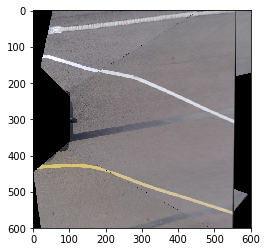

In [2]:
path='./day2_lane1/1296.jpg'
img=cv2.imread(path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
img = cv2.bilateralFilter(img,9,25,75)
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

yellow_low = np.array([[[18, 80, 80]]])
yellow_high = np.array([[[30, 255, 255]]])

yellow_mask = cv2.inRange(img_hsv, yellow_low, yellow_high)

color_mask = cv2.bitwise_and(img,img, mask=yellow_mask)


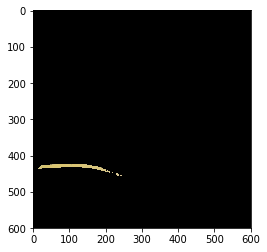

In [4]:
plt.imshow(color_mask)

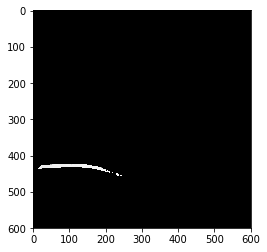

In [36]:
dst = cv2.cvtColor(color_mask, cv2.COLOR_BGR2GRAY)
plt.imshow(dst, cmap='gray')

In [37]:
# Show plot
r_lane = cv2.Canny(dst,100,200)

# http://stackoverflow.com/a/29799815/1698058
# Get index of matching value.
def find_first(item, vec):
    """return the index of the first occurence of item in vec"""
    for i in range(len(vec)):
        if item == vec[i]:
            return i
    return -1

bounds = [400, 500]
# Now the points we want are the lowest-index 255 in each row
window = r_lane[bounds[1]:bounds[0]:-1].transpose()

xy = []
for i in range(len(window)):
    col = window[i]
    j = find_first(255, col)
    if j != -1:
        xy.extend((i, j))
# Reshape into [[x1, y1],...]
data = np.array(xy).reshape((-1, 2))
# Translate points back to original positions.
data[:, 1] = bounds[1] - data[:, 1]

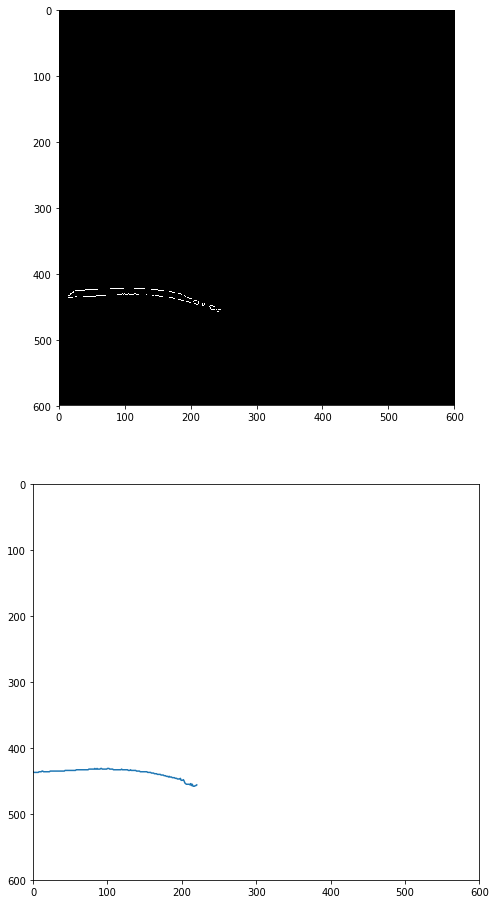

In [38]:
plt.figure(1, figsize=(8, 16))
ax1 = plt.subplot(211)
ax1.imshow(r_lane,cmap = 'gray')
ax2 = plt.subplot(212)
ax2.axis([0, r_lane.shape[1], r_lane.shape[0], 0])
ax2.plot(data[:,1])
plt.show()

In [39]:
xdata = data[:,0]
ydata = data[:,1]

z = np.polyfit(xdata, ydata, 2)
f = np.poly1d(z)

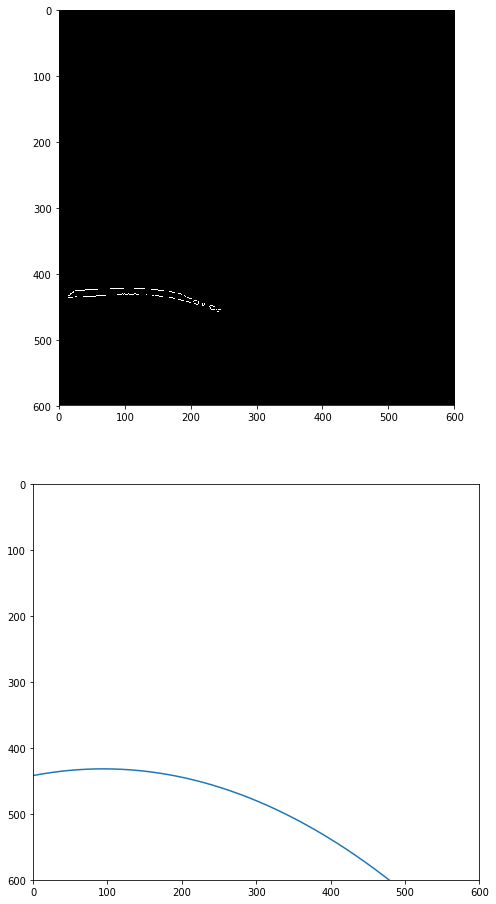

In [40]:
t = np.arange(0, r_lane.shape[1], 1)
plt.figure(2, figsize=(8, 16))
ax1 = plt.subplot(211)
ax1.imshow(r_lane,cmap = 'gray')
ax2 = plt.subplot(212)
ax2.axis([0, r_lane.shape[1], r_lane.shape[0], 0])
ax2.plot(t, f(t))
plt.show()

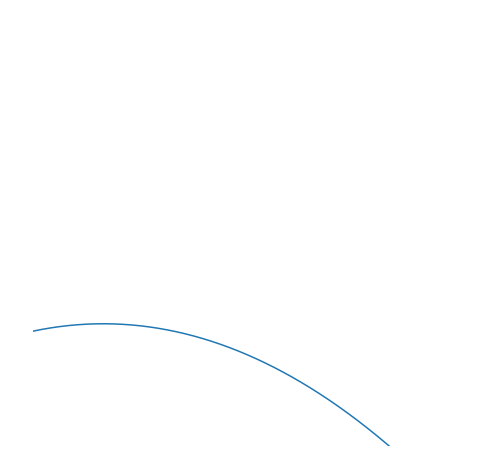

In [41]:
t = np.arange(0, r_lane.shape[1], 1)
fig = plt.figure(figsize=(8,8))
plt.axis([0, r_lane.shape[1], r_lane.shape[0], 0])
plt.plot(t, f(t))
plt.axis('off')
plt.tight_layout
# fig.savefig('graph.png')
fig.savefig('graph.png', bbox_inches='tight',pad_inches=0)

In [42]:
graph=cv2.imread('graph.png')
graph.shape

(455, 481, 3)